<a href="https://colab.research.google.com/github/RoaaM/stroke_dataset/blob/main/Stroke_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**EDA**

In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=1bfc88a726ff47806f73d9e7e39ced184391d3c3d711bd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-3-8a8ba687a7e7>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
data.drop(['id'],axis=1,inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.isna().sum()/100

gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  2.01
smoking_status       0.00
stroke               0.00
dtype: float64

In [ ]:
(data==0).sum()

gender                  0
age                     0
hypertension         4612
heart_disease        4834
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status          0
stroke               4861
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['bmi'].fillna(data['bmi'].median(),inplace=True)

In [ ]:
obj=data.select_dtypes(include=['object'])
obj

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [ ]:
non_obj=data.select_dtypes(exclude=['object'])
non_obj

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


<ipython-input-15-58dbfc3e521c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_obj[non_obj.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
<ipython-input-15-58dbfc3e521c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_obj[non_obj.columns[i]],kde_kws={'c

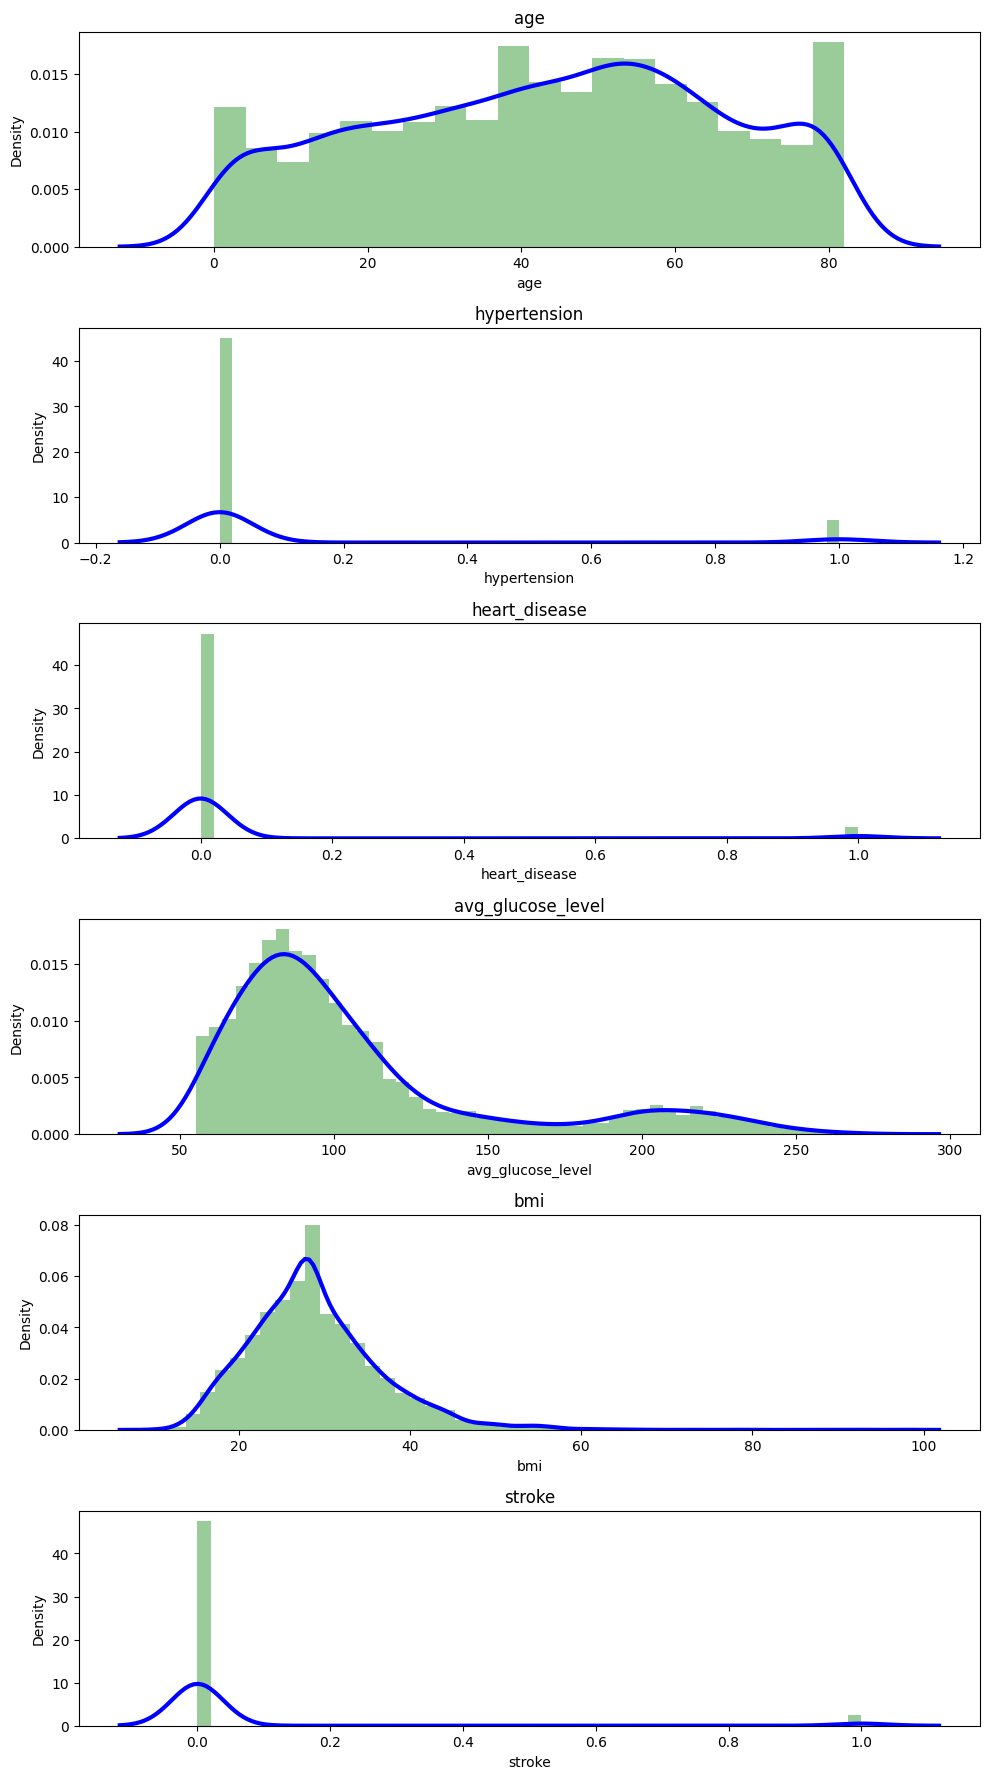

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(non_obj.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(non_obj[non_obj.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
  plt.title(non_obj.columns[i])
plt.tight_layout()

<Axes: >

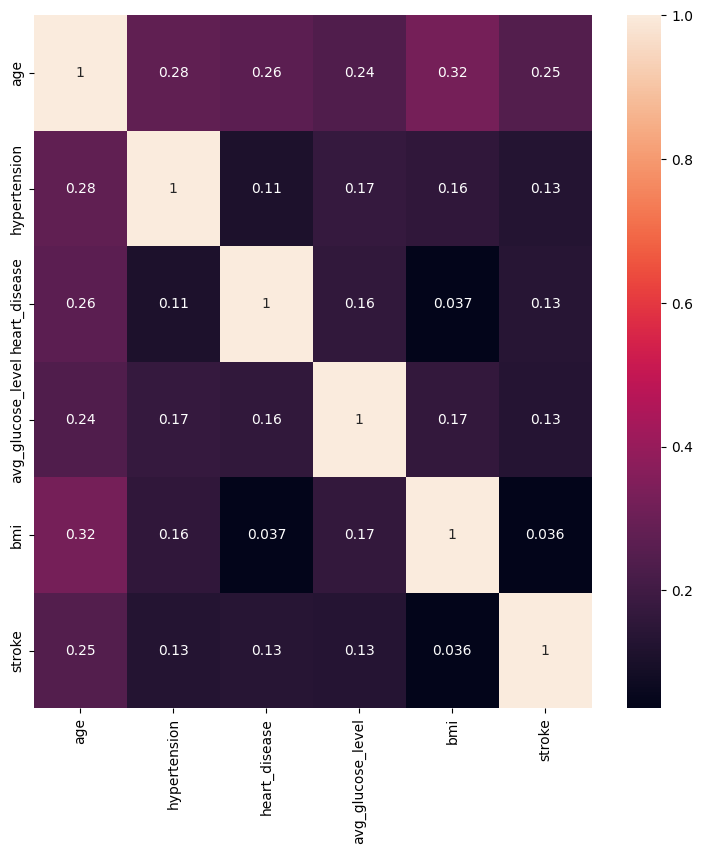

In [ ]:
plt.subplots(figsize=(9,9))
sns.heatmap(non_obj.corr(),annot=True)

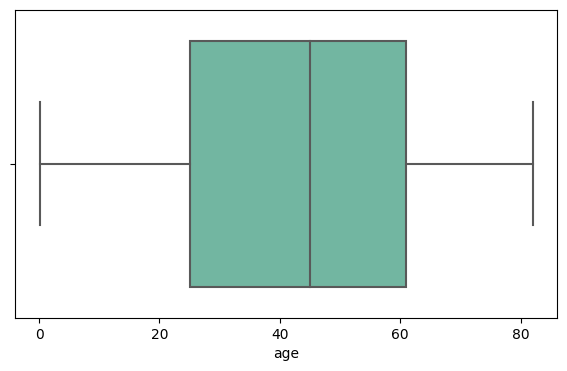

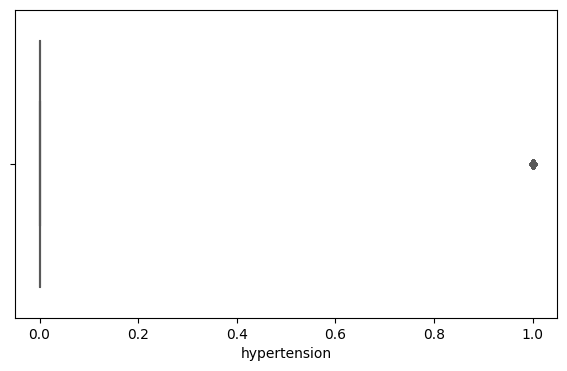

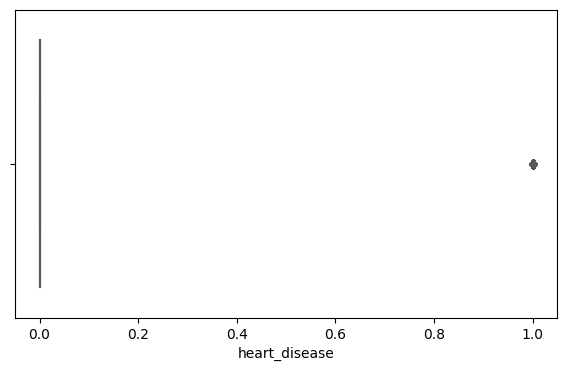

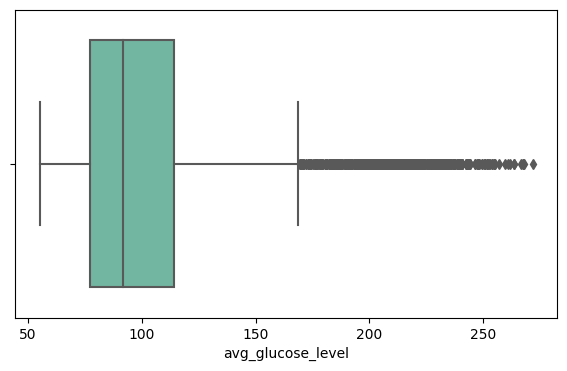

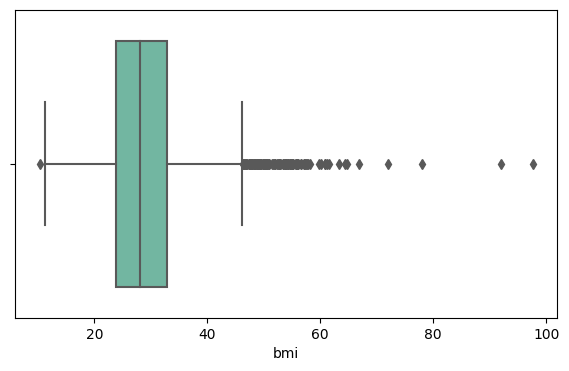

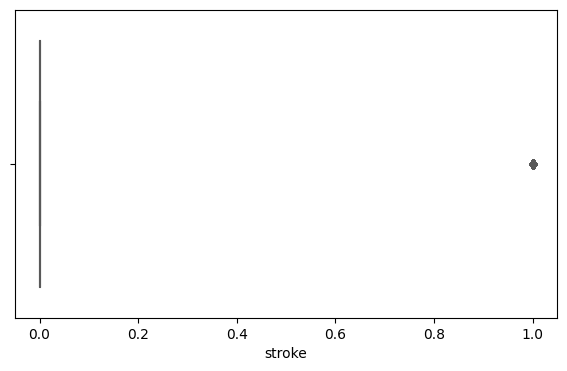

In [ ]:
num_cols = data.keys()
for i in num_cols:
    if data[i].dtypes !="object":
      plt.figure(figsize=(7,4))
      sns.boxplot(x=data[i],palette="Set2");
      plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

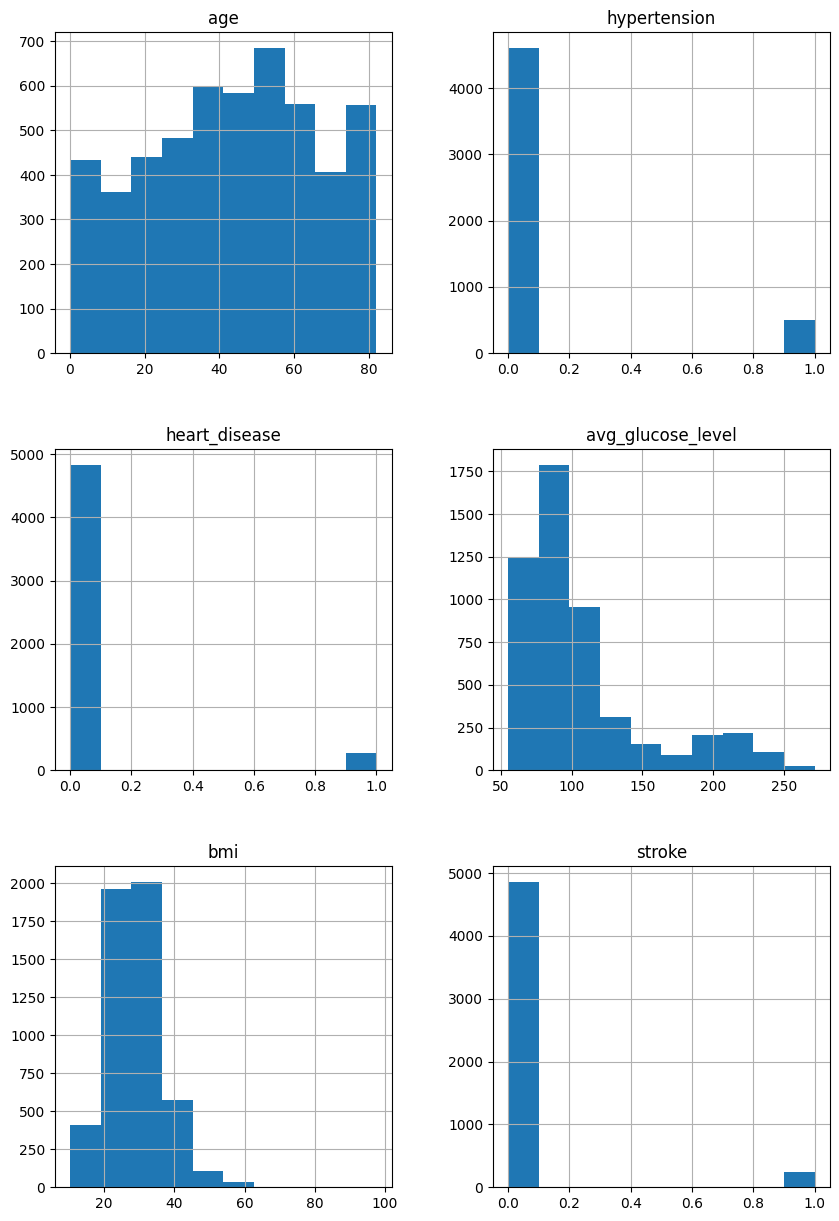

In [ ]:
non_obj.hist(figsize=(10,15))

In [ ]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
obj.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.corr()['stroke']

<ipython-input-25-d6e4beef8cf1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['stroke']


age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.036110
stroke               1.000000
Name: stroke, dtype: float64

In [ ]:
df=non_obj

In [ ]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [ ]:
obj['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
    ])

In [ ]:
under_15 = data[data['age'] <= 15]
under_15

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,28.1,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
253,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5089,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


In [ ]:
smokers = data[data['smoking_status'] == 'smokes']
smokers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
12,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
17,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
5082,Female,44.0,0,0,Yes,Private,Rural,72.03,37.5,smokes,0
5084,Male,67.0,0,0,Yes,Private,Rural,97.04,26.9,smokes,0
5090,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,28.1,smokes,0


In [ ]:
under_15_df = pd.merge(under_15, smokers, how='inner')
under_15_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,13.0,0,0,No,Private,Rural,60.69,24.0,smokes,0
1,Female,12.0,0,0,No,children,Rural,207.45,25.4,smokes,0
2,Male,10.0,0,0,No,children,Urban,63.08,20.5,smokes,0
